reference: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [83]:
df_iris = pd.read_csv('./datasets/iris.data', names=['sepal length','sepal width','petal length','petal width','target'])

In [84]:
df_iris.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
df_iris.shape
# total 4 features and 150 samples

(150, 5)

In [86]:
features = ['sepal length','sepal width','petal length','petal width']

# Separting out the features
x = df_iris.loc[:, features].values

# Separating out the target
y = df_iris.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [87]:
# Check the standardized data
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [88]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_
# """
# array([0.72770452, 0.23030523, 0.03683832, 0.00515193])
# """

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

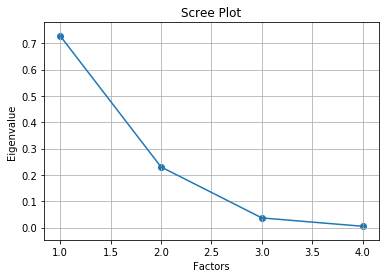

In [89]:
# data visualization
importance = pca.explained_variance_ratio_
plt.scatter(range(1,5), importance)
plt.plot(range(1,5), importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### PCA dimension reduced

In [90]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_iris[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [91]:
pca.components_
# """
# array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
#        [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])
# """

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [92]:
(np.dot(x[0],pca.components_[0]), np.dot(x[0],pca.components_[1]))
# """
# (-2.2645417283949003, 0.5057039027737843)
# """

(-2.2645417283949, 0.5057039027737839)

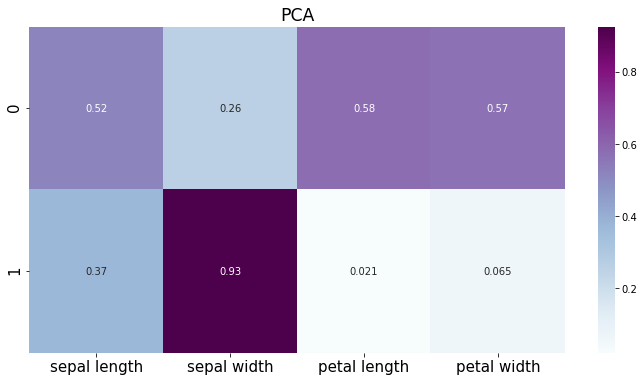

In [93]:
# data visualization for coefficient
import seaborn as sns

df_cm = pd.DataFrame(np.abs(pca.components_), columns=df_iris.columns[:-1])
plt.figure(figsize=(12,6))
ax = sns.heatmap(df_cm, annot=True, cmap='BuPu')

# change the font size
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
plt.title('PCA', fontsize='xx-large')

# Set y-axis label
plt.savefig('factorAnalysis.png', dpi=200)

### Reduced Data Visualization

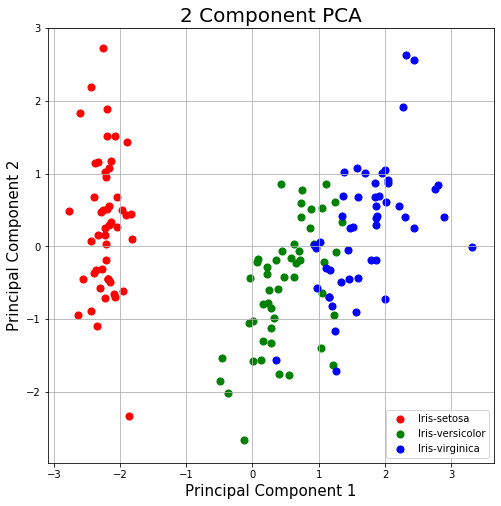

In [94]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    # select some data from labels and plot graphs
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], \
               finalDf.loc[indicesToKeep, 'principal component 2'], \
                c = color, \
                s = 50)

ax.legend(targets)
ax.grid()

### Factor Analyzer

In [95]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(706.3613782659302, 1.2867954087796583e-149)

In [96]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(4, rotation=None)
fa.fit(x)

# Check Eigenvalue
ev, v = fa.get_eigenvalues()

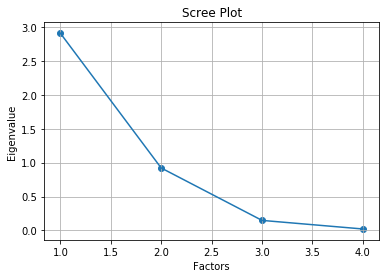

In [97]:
# Create scree plot using matplotlib
plt.scatter(range(1, 4+1), ev)
plt.plot(range(1, 4+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [98]:
# Reduced dimension to 2D
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(x)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

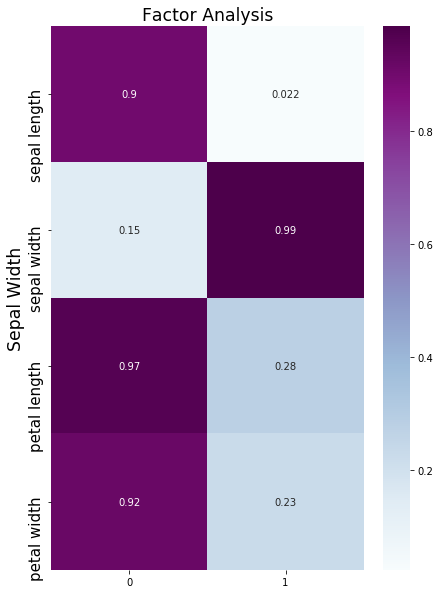

In [99]:
# Data visualzation
df_cm2 = pd.DataFrame(np.abs(fa.loadings_), index=df_iris.columns[: -1])
plt.figure(figsize=(7,10))
ax = sns.heatmap(df_cm2, annot=True, cmap='BuPu')
ax.yaxis.set_tick_params(labelsize=15)
plt.title('Factor Analysis', fontsize='xx-large')
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('factorAnalysis.png', dpi = 200)

In [100]:
x_2 = fa.transform(x)

In [103]:
principalDf = pd.DataFrame(data = x_2, columns=['FA 1', 'FA 2'])
finalDf = pd.concat([principalDf, df_iris[['target']]], axis = 1)
finalDf.head()

,FA 1,FA 2,target
0,-1.154808,0.869414,Iris-setosa
1,-1.577805,-0.370153,Iris-setosa
2,-1.428828,0.126299,Iris-setosa
3,-1.295267,-0.073661,Iris-setosa
4,-1.030080,1.128438,Iris-setosa


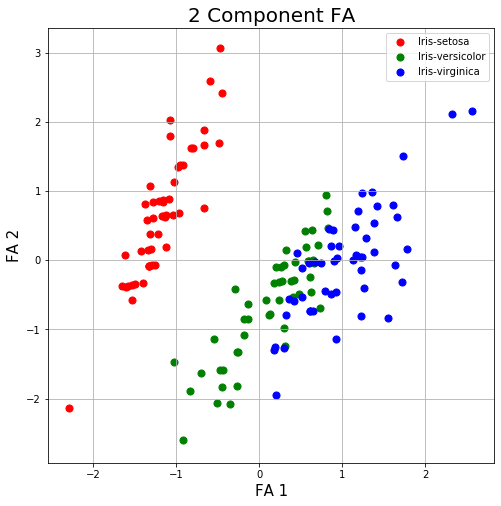

In [104]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('FA 1', fontsize =15)
ax.set_ylabel('FA 2', fontsize =15)
ax.set_title('2 Component FA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'FA 1'],\
                finalDf.loc[indicesToKeep, 'FA 2'],\
                c = color,\
                s = 50)

ax.legend(targets)
ax.grid()